In [1]:
import numpy as np 
import pandas as pd

In [17]:
df = pd.read_csv('dataset/pima-indians-diabetes.csv',
names = ["pregnant", "plasma", "pressure", "thickness",
"insulin", "BMI", "pedigree", "age", "class"], header=None)
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [15]:
print(df.describe())

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [18]:
print(df[['pregnant','class']].groupby(['pregnant'],
as_index=False).mean().
sort_values(by='pregnant', ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,:-1].values, df.iloc[:,-1].values,
    stratify=df.iloc[:,-1].values, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [4]:
import tensorflow as tf 
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [34]:
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu')) #hidden lyer1
model.add(Dense(8, activation='relu'))                     # hideen layer2
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [36]:
model.fit(
    X_train, y_train, 
    validation_split=0.2,
    epochs=200,
    batch_size=50
)

l_accuracy: 0.6983
Epoch 61/200
10/10 [==============================] - 0s 2ms/step - loss: 0.5617 - accuracy: 0.7152 - val_loss: 0.6517 - val_accuracy: 0.6379
Epoch 62/200
10/10 [==============================] - 0s 3ms/step - loss: 0.5597 - accuracy: 0.7196 - val_loss: 0.6324 - val_accuracy: 0.6638
Epoch 63/200
10/10 [==============================] - 0s 3ms/step - loss: 0.5550 - accuracy: 0.7217 - val_loss: 0.6401 - val_accuracy: 0.6724
Epoch 64/200
10/10 [==============================] - 0s 3ms/step - loss: 0.5549 - accuracy: 0.7239 - val_loss: 0.6314 - val_accuracy: 0.6552
Epoch 65/200
10/10 [==============================] - 0s 3ms/step - loss: 0.5567 - accuracy: 0.7261 - val_loss: 0.6159 - val_accuracy: 0.6724
Epoch 66/200
10/10 [==============================] - 0s 2ms/step - loss: 0.5581 - accuracy: 0.7065 - val_loss: 0.7063 - val_accuracy: 0.6379
Epoch 67/200
10/10 [==============================] - 0s 2ms/step - loss: 0.5620 - accuracy: 0.7022 - val_loss: 0.6112 - val_accu

In [37]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 996us/step - loss: 0.5622 - accuracy: 0.7083


[0.562229335308075, 0.7083333134651184]

### MinMaxscaler

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled= scaler.fit_transform(df.iloc[:,:-1].values)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df.iloc[:,-1].values,
    stratify=df.iloc[:,-1].values, random_state=seed
)

In [44]:
model4 = Sequential()
model4.add(Dense(12, input_dim=8, activation='relu'))
model4.add(Dense(8, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))
model4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [45]:
model4.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']
)

In [46]:
history4 = model4.fit(
    X_train, y_train, validation_split=0.2,
    epochs=200, batch_size=50, verbose=2
)

0.6466
Epoch 2/200
10/10 - 0s - loss: 0.6735 - accuracy: 0.6630 - val_loss: 0.6785 - val_accuracy: 0.5948
Epoch 3/200
10/10 - 0s - loss: 0.6676 - accuracy: 0.6652 - val_loss: 0.6775 - val_accuracy: 0.5862
Epoch 4/200
10/10 - 0s - loss: 0.6631 - accuracy: 0.6652 - val_loss: 0.6768 - val_accuracy: 0.5862
Epoch 5/200
10/10 - 0s - loss: 0.6582 - accuracy: 0.6652 - val_loss: 0.6762 - val_accuracy: 0.5862
Epoch 6/200
10/10 - 0s - loss: 0.6549 - accuracy: 0.6652 - val_loss: 0.6756 - val_accuracy: 0.5862
Epoch 7/200
10/10 - 0s - loss: 0.6515 - accuracy: 0.6652 - val_loss: 0.6744 - val_accuracy: 0.5862
Epoch 8/200
10/10 - 0s - loss: 0.6491 - accuracy: 0.6652 - val_loss: 0.6743 - val_accuracy: 0.5862
Epoch 9/200
10/10 - 0s - loss: 0.6457 - accuracy: 0.6652 - val_loss: 0.6724 - val_accuracy: 0.5862
Epoch 10/200
10/10 - 0s - loss: 0.6428 - accuracy: 0.6652 - val_loss: 0.6698 - val_accuracy: 0.5862
Epoch 11/200
10/10 - 0s - loss: 0.6400 - accuracy: 0.6652 - val_loss: 0.6696 - val_accuracy: 0.5862
E

In [47]:
model4.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.4530 - accuracy: 0.7865


[0.4530090093612671, 0.7864583134651184]

### 시각화

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
y_acc = history4.history['accuracy']
y_vloss = history4.history['val_loss']
x_len = np.arange(len(y_acc))

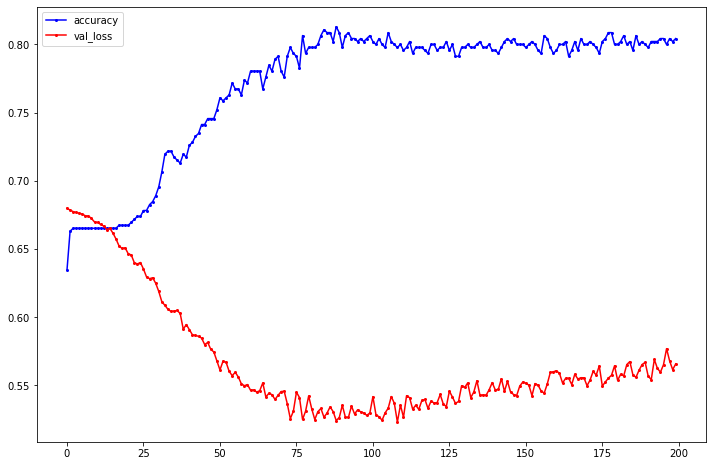

In [51]:
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()